In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv("Life Expectancy Data.csv")
raw_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
raw_data.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [5]:
column_names = ['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-Five Deaths ', 'Polio',
       'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'Thinness 1-19 years', 'Thinness 5-9 years',
       'Income Composition of Resources', 'Schooling']

In [6]:
raw_data.columns = column_names
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

In [7]:
data1 = raw_data.copy()

In [8]:
data1 = data1.dropna(axis = 0, subset = ['Life Expectancy'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   Percentage Expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  Under-Five Deaths                2928 non-null   int64  
 12  Polio               

In [9]:
data1.mean()

Year                               2.007500e+03
Life Expectancy                    6.922493e+01
Adult Mortality                    1.647964e+02
Infant Deaths                      3.040745e+01
Alcohol                            4.614856e+00
Percentage Expenditure             7.403212e+02
Hepatitis B                        8.096084e+01
Measles                            2.427856e+03
BMI                                3.823539e+01
Under-Five Deaths                  4.217930e+01
Polio                              8.254830e+01
Total Expenditure                  5.930163e+00
Diphtheria                         8.232142e+01
HIV/AIDS                           1.747712e+00
GDP                                7.494211e+03
Population                         1.276454e+07
Thinness 1-19 years                4.850622e+00
Thinness 5-9 years                 4.881423e+00
Income Composition of Resources    6.274187e-01
Schooling                          1.199964e+01
dtype: float64

In [10]:
data1 = data1.fillna(data1.mean())
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2928 non-null   int64  
 6   Alcohol                          2928 non-null   float64
 7   Percentage Expenditure           2928 non-null   float64
 8   Hepatitis B                      2928 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2928 non-null   float64
 11  Under-Five Deaths                2928 non-null   int64  
 12  Polio               

In [11]:
data1.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
data1 = data1.drop('Country', axis = 1)
data1.head()

,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
data1['Status'] = data1['Status'].map({'Developing' : 0, 'Developed' : 1})

In [14]:
data1.head(5)

,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
column_2 = ['Year', 'Status', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-Five Deaths ', 'Polio',
       'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 years', 'Thinness 5-9 years',
       'Income Composition of Resources', 'Schooling', 'Life Expectancy']

In [16]:
data1 = data1[column_2]
data1.head()

,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Life Expectancy
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [17]:
data_preprocessed = data1.copy()

In [18]:
data_preprocessed.head()

,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Life Expectancy
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [19]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2928 non-null   int64  
 1   Status                           2928 non-null   int64  
 2   Adult Mortality                  2928 non-null   float64
 3   Infant Deaths                    2928 non-null   int64  
 4   Alcohol                          2928 non-null   float64
 5   Percentage Expenditure           2928 non-null   float64
 6   Hepatitis B                      2928 non-null   float64
 7   Measles                          2928 non-null   int64  
 8   BMI                              2928 non-null   float64
 9   Under-Five Deaths                2928 non-null   int64  
 10  Polio                            2928 non-null   float64
 11  Total Expenditure                2928 non-null   float64
 12  Diphtheria          

In [20]:
data_with_targets = data_preprocessed.copy()

In [21]:
targets = data_with_targets.iloc[:,-1]
targets.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life Expectancy, dtype: float64

In [22]:
targets.shape

(2928,)

In [23]:
inputs = data_with_targets.iloc[:,:-1]
inputs.head()

,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
inputs.shape

(2928, 20)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_test_split(inputs, targets)

[      Year  Status  Adult Mortality  Infant Deaths  Alcohol  \
 2856  2001       0            179.0              0     0.91   
 1675  2007       0            161.0              0     3.24   
 2819  2006       0            117.0              1     6.58   
 1735  2012       0             11.0              0     0.01   
 435   2012       0            415.0             59     3.24   
 ...    ...     ...              ...            ...      ...   
 1559  2010       0            248.0             32     1.03   
 2903  2002       0             25.0             45     0.07   
 1476  2013       0            518.0              4     0.01   
 778   2007       0            164.0              6     6.05   
 714   2006       0            165.0             10     3.28   
 
       Percentage Expenditure  Hepatitis B  Measles   BMI  Under-Five Deaths   \
 2856              163.105292         68.0        7  41.9                   0   
 1675              582.514374         97.0       13  29.1           

In [27]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, train_size = 0.8, random_state = 20)

In [28]:
print(x_train.shape, y_train.shape)

(2342, 20) (2342,)


In [29]:
print(x_test.shape, y_test.shape)

(586, 20) (586,)


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [32]:
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [33]:
regressor.score(x_train, y_train)

0.9917162434333671

In [34]:
pred = regressor.predict(x_test)

In [35]:
pred

array([78.72, 49.76, 80.55, 62.94, 49.51, 73.62, 73.9 , 74.3 , 53.53,
       76.71, 79.6 , 74.18, 55.07, 82.31, 74.22, 74.2 , 72.85, 81.9 ,
       80.39, 75.41, 74.28, 72.61, 52.39, 75.06, 62.86, 83.85, 49.26,
       80.31, 62.15, 70.84, 79.2 , 44.42, 75.08, 64.78, 74.82, 63.35,
       67.88, 57.64, 82.34, 79.75, 54.58, 55.45, 72.93, 63.82, 74.05,
       69.93, 54.8 , 63.34, 56.95, 67.15, 56.46, 76.04, 72.71, 45.93,
       71.96, 76.66, 82.51, 82.34, 52.94, 72.97, 75.68, 56.55, 64.02,
       68.76, 68.38, 83.02, 76.61, 83.34, 64.35, 76.67, 72.27, 60.1 ,
       74.01, 74.86, 62.39, 65.96, 58.21, 79.83, 54.59, 65.35, 57.09,
       72.41, 79.36, 66.  , 73.33, 74.18, 69.49, 72.94, 72.12, 74.78,
       82.76, 54.27, 73.72, 51.73, 64.01, 74.67, 55.84, 61.15, 63.12,
       67.46, 60.08, 67.53, 55.77, 63.77, 64.39, 59.4 , 72.04, 68.76,
       60.13, 47.13, 74.06, 69.49, 63.18, 68.46, 77.15, 67.56, 58.79,
       71.57, 69.64, 78.68, 78.17, 67.32, 70.71, 72.06, 72.52, 62.28,
       53.82, 74.87,

In [36]:
regressor.score(x_test, y_test)

0.9624842170870651

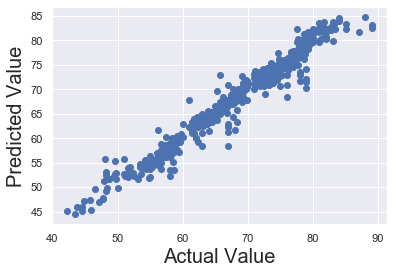

In [39]:
plt.scatter(y_test, pred)
plt.xlabel('Actual Value', fontsize = 20)
plt.ylabel('Predicted Value', fontsize = 20)
plt.show()

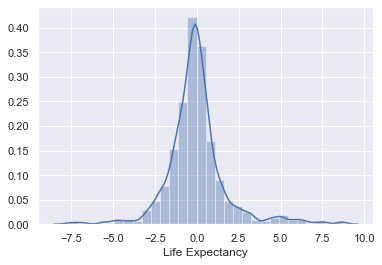

In [43]:
sns.distplot((y_test-pred),bins=30)

In [44]:
from sklearn import metrics

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.156655290102389
MSE: 3.2687901023890786
RMSE: 1.8079795635982943
